<a href="https://colab.research.google.com/github/Priyankavaishnav1006/Stock_Sales_ML_Model/blob/main/Stock_sales_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path= '/content/drive/MyDrive/ML Data 2.csv'
df = pd.read_csv(file_path)

#check 1st five and last five rows
print(df)

#check columns and data type
print(df.info())

          Rows No  Location ID    DealDate Currency Type  Type  Amount  \
0        28937647          140  04/01/2022      JMD    N     S   77000   
1        28937648          140  04/01/2022      XCD    N     S    1000   
2        28937649          140  04/01/2022      KRW    N     S  910000   
3        28937650          140  04/01/2022      EUR    N     S     705   
4        28937651          140  04/01/2022      TRY    N     S    3215   
...           ...          ...         ...      ...  ...   ...     ...   
8234155  46696722           38  30/04/2025      EUR    N     S     335   
8234156  46696723           38  30/04/2025      EUR    N     B     200   
8234157  46696724           38  30/04/2025      EUR    N     S     100   
8234158  46696725           38  30/04/2025      JPY    N     S   27000   
8234159  46696726          272  29/04/2025      EUR    N     S     340   

          Value  OriginationID  OrderTypeID  
0        401.68              2            2  
1        293.17    

# New section

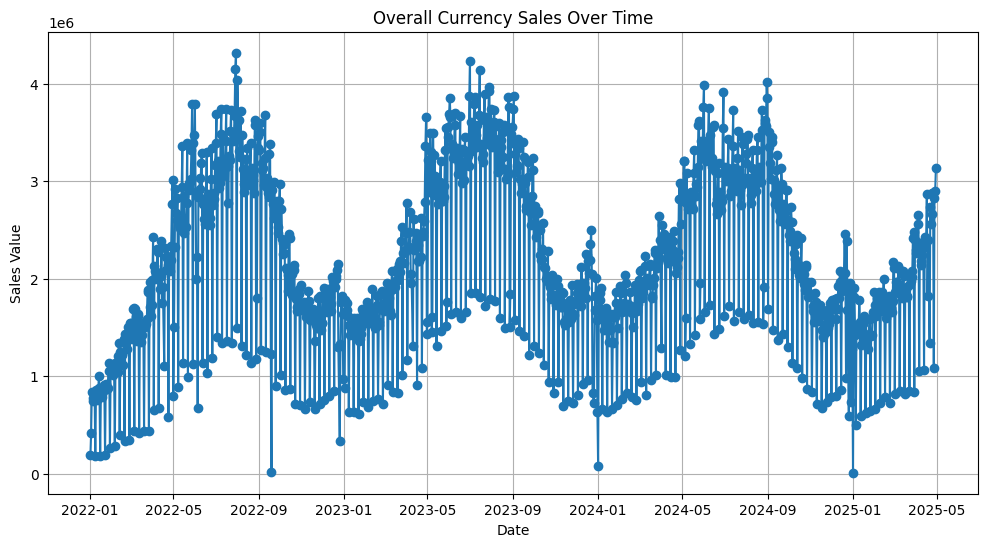

In [ ]:
import warnings
warnings.filterwarnings("ignore")   # Ignore warnings

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


#convert 'Deal date' to dataframe
#df['DealDate'] = pd.to_datetime(df['DealDate'],dayfirst=True)


#Data Visualization total sales value over time.
#daily_sales = df.groupby('DealDate')['value'].sum().reset_index()

#plt.figure(figsize=(14,6))
#plt.plot(daily_sales['Dealdate'],daily_sales[value],color='blue')
#plt.title('Total sales value over Time')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.grid(True)
#plt.show()
# Plot Sales Trend Over Time (All Currencies Combined)
df_grouped = df.groupby('DealDate').agg({'Value': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['DealDate'], df_grouped['Value'], marker='o')
plt.title('Overall Currency Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.grid()
plt.show()


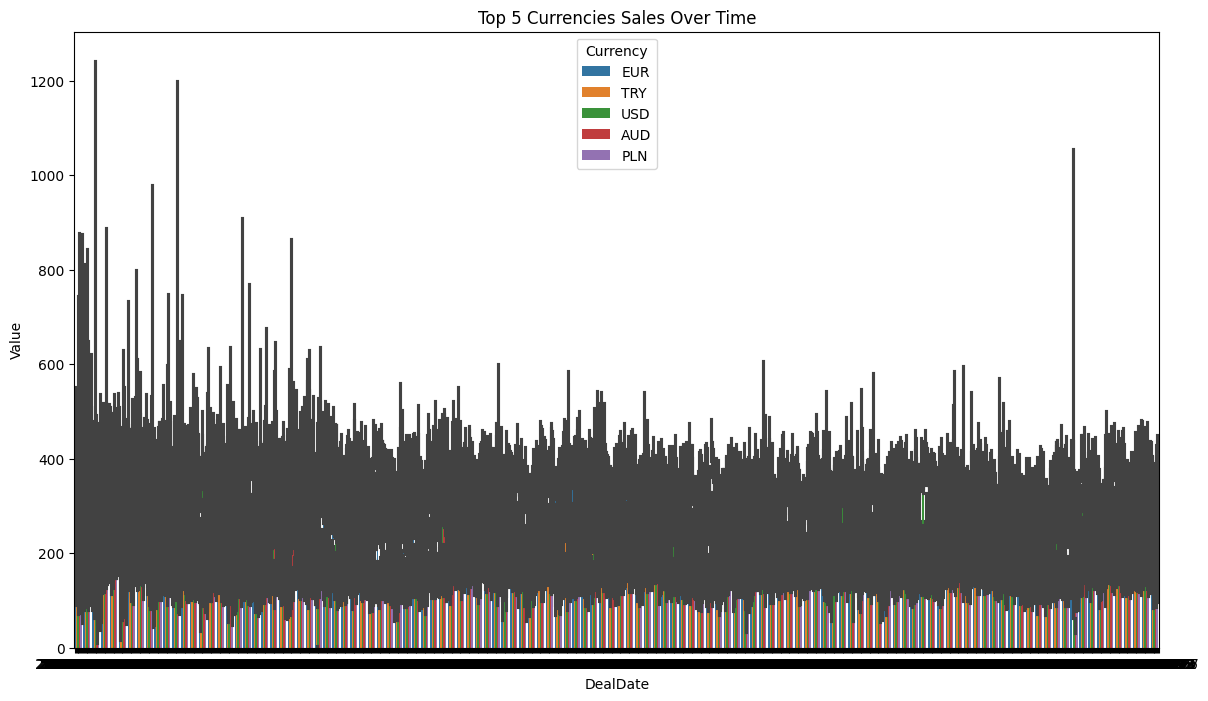

In [ ]:
#Sales Trend per Currency (Example: Top 5)
top_currencies = df['Currency'].value_counts().head(5).index
df_top = df[df['Currency'].isin(top_currencies)]

plt.figure(figsize=(14, 8))
sns.barplot(data=df_top, x='DealDate', y='Value', hue='Currency')
plt.title('Top 5 Currencies Sales Over Time')
plt.show()

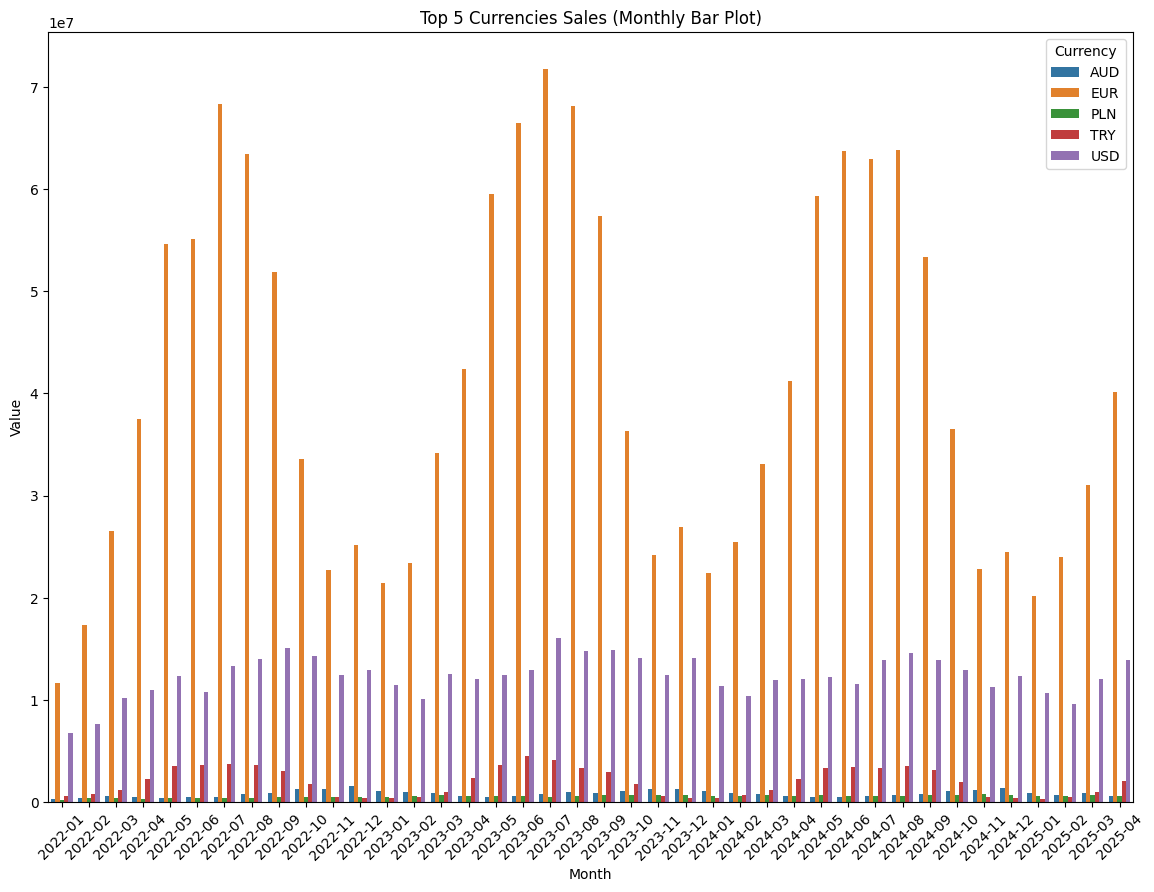

In [ ]:
# Create 'Month' column
df_top['Month'] = df_top['DealDate'].dt.to_period('M').astype(str)

# Group by Month and Currency
df_monthly = df_top.groupby(['Month', 'Currency']).agg({'Value': 'sum'}).reset_index()

# Bar plot
plt.figure(figsize=(14, 10))
sns.barplot(data=df_monthly, x='Month', y='Value', hue='Currency')
plt.title('Top 5 Currencies Sales (Monthly Bar Plot)')
plt.xticks(rotation=45)
plt.show()


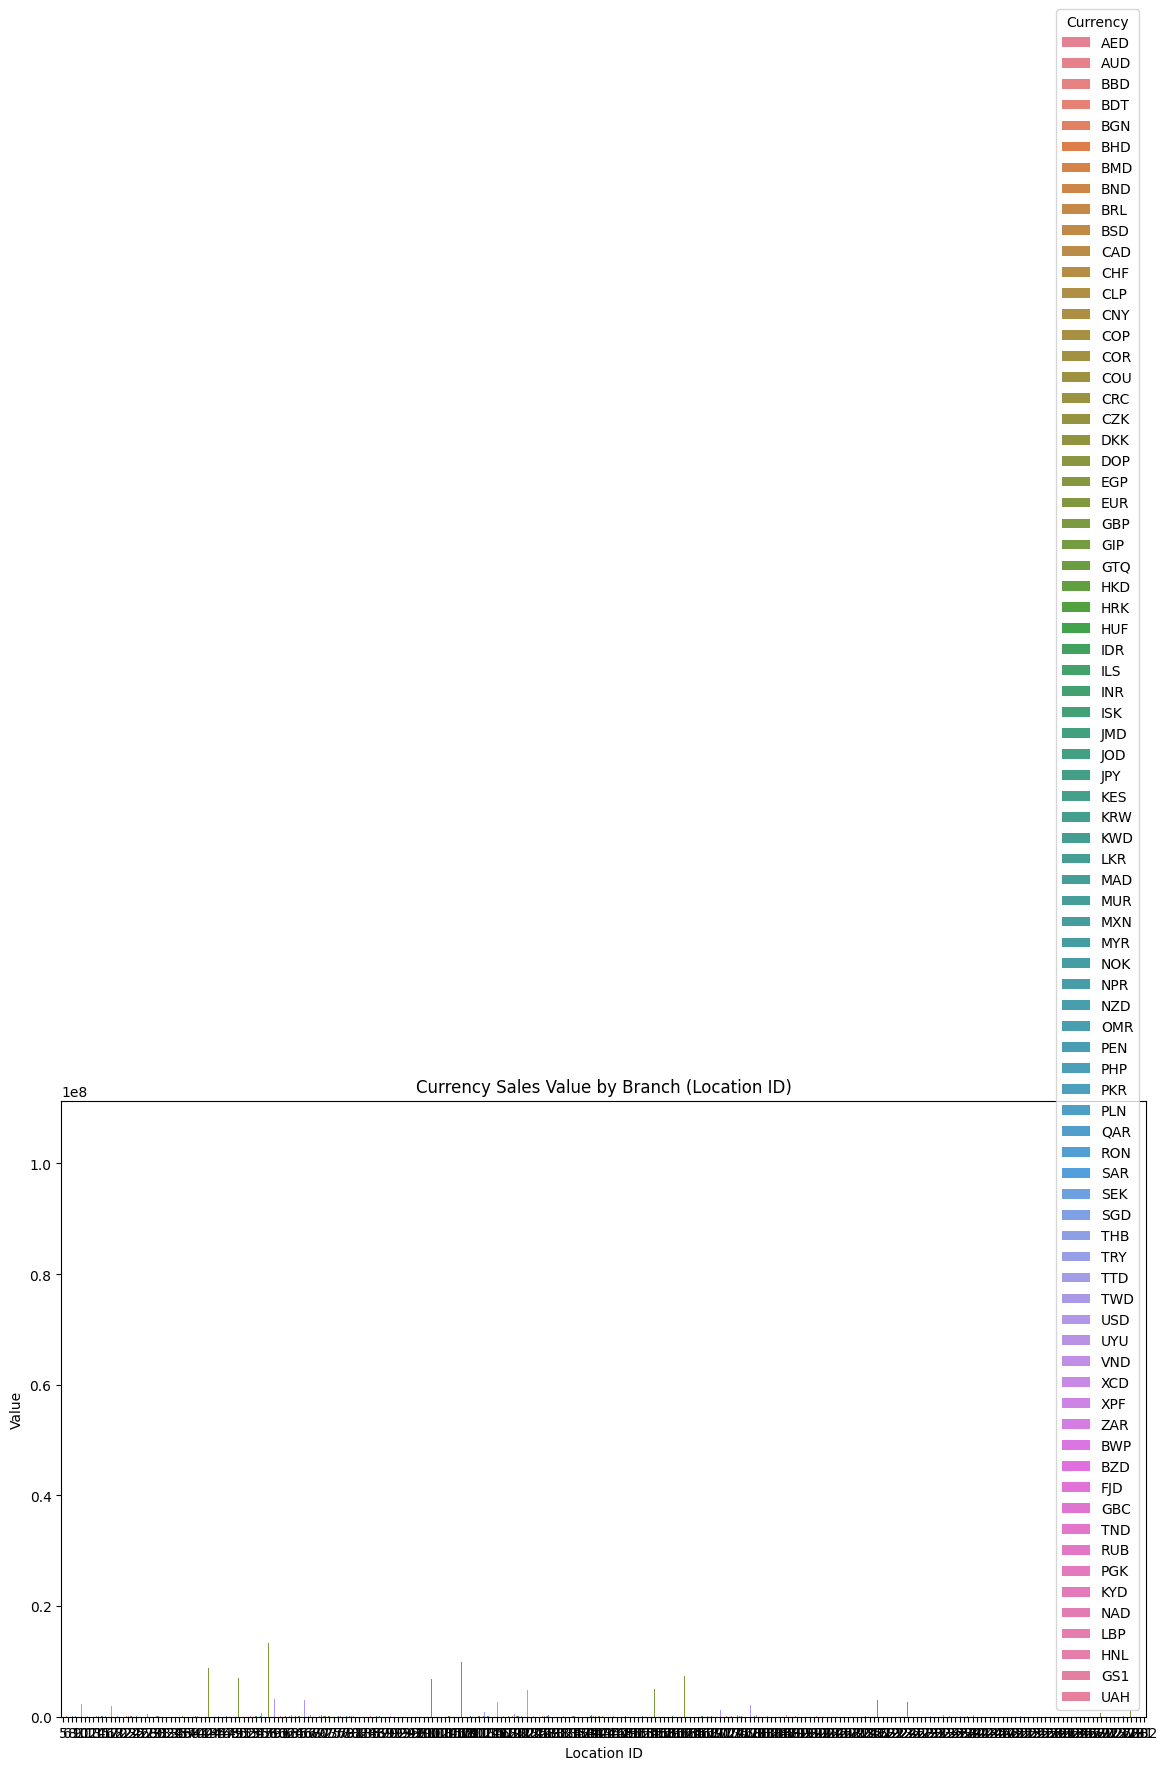

In [ ]:
#Sales Trend per Branch
# Group by Branch and Currency
df_branch = df.groupby(['Location ID', 'Currency']).agg({'Value': 'sum'}).reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_branch, x='Location ID', y='Value', hue='Currency')
plt.title('Currency Sales Value by Branch (Location ID)')
plt.show()

In [19]:
branch_sales = df.groupby('Location ID')['Value'].sum().reset_index().sort_values(by='Value', ascending=False)
print(branch_sales)

     Location ID         Value
123          140  2.043397e+08
55            65  4.372696e+07
20            28  3.115195e+07
98           113  2.825174e+07
63            75  2.544149e+07
..           ...           ...
252          282  4.393004e+05
189          216  3.143203e+05
220          248  1.787840e+05
194          222  1.087436e+05
244          272  1.539304e+04

[253 rows x 2 columns]


In [20]:
#Monthly Sales per Branch
# Convert 'DealDate' to datetime if not done already
df['DealDate'] = pd.to_datetime(df['DealDate'], dayfirst=True)

# Create 'Month' column
df['Month'] = df['DealDate'].dt.to_period('M')

# Group by Month and Branch
monthly_branch_sales = df.groupby(['Month', 'Location ID'])['Value'].sum().reset_index()

# Show results
print(monthly_branch_sales)

        Month  Location ID      Value
0     2022-01            5   70615.84
1     2022-01            6   59745.49
2     2022-01            9   29661.98
3     2022-01           10  144107.98
4     2022-01           11  173849.63
...       ...          ...        ...
8638  2025-04          278   50096.99
8639  2025-04          279  134928.42
8640  2025-04          280  188247.96
8641  2025-04          281  269651.98
8642  2025-04          282   50661.91

[8643 rows x 3 columns]


In [21]:
# Create 'Week' column
df['Week'] = df['DealDate'].dt.to_period('W')

# Group by Week and Branch
weekly_branch_sales = df.groupby(['Week', 'Location ID'])['Value'].sum().reset_index()

# Show results
print(weekly_branch_sales)

                        Week  Location ID     Value
0      2021-12-27/2022-01-02           11   3319.73
1      2021-12-27/2022-01-02           15    676.18
2      2021-12-27/2022-01-02           28   9160.85
3      2021-12-27/2022-01-02           36   2940.39
4      2021-12-27/2022-01-02           44   1911.16
...                      ...          ...       ...
37347  2025-04-28/2025-05-04          278   3722.58
37348  2025-04-28/2025-05-04          279   9644.90
37349  2025-04-28/2025-05-04          280  22662.74
37350  2025-04-28/2025-05-04          281  32874.38
37351  2025-04-28/2025-05-04          282  10369.57

[37352 rows x 3 columns]


In [22]:
currency_sales = df.groupby('Currency')['Value'].sum().reset_index().sort_values(by='Value', ascending=False)
print(currency_sales)

   Currency         Value
24      EUR  1.624631e+09
74      USD  4.934190e+08
70      TRY  7.847823e+07
0       AED  3.685932e+07
1       AUD  3.313679e+07
..      ...           ...
29      GS1  3.183000e+03
52      NAD  2.627400e+03
46      LBP  1.976790e+03
32      HNL  3.075900e+02
73      UAH  1.174000e+01

[80 rows x 2 columns]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qtlv3pr/izkl5vr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qtlv3pr/kd6vhajx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80991', 'data', 'file=/tmp/tmp5qtlv3pr/izkl5vr7.json', 'init=/tmp/tmp5qtlv3pr/kd6vhajx.json', 'output', 'file=/tmp/tmp5qtlv3pr/prophet_model7errdh2w/prophet_model-20250601215829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:58:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


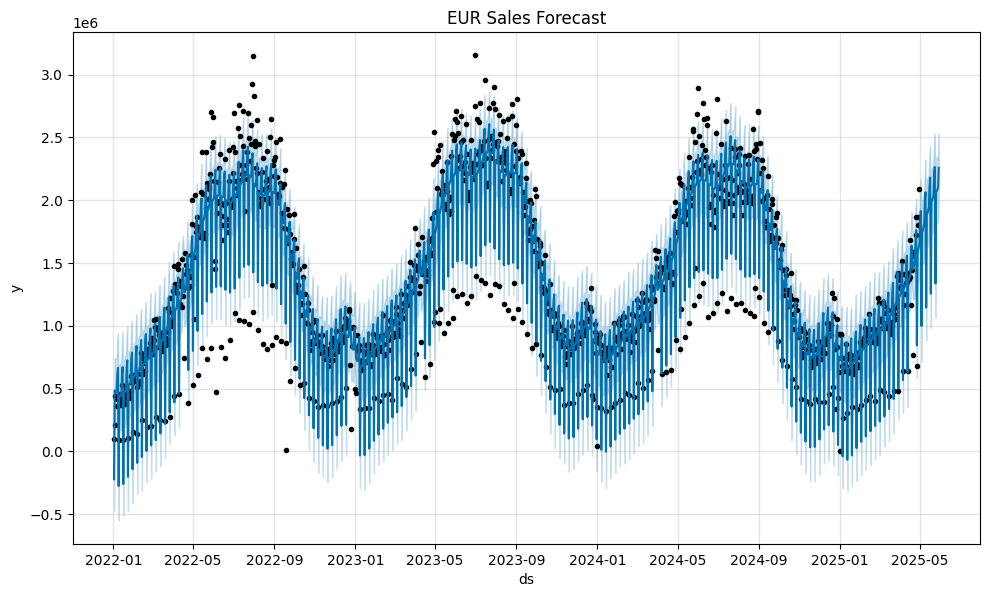

In [23]:
#Prophet Forecasting (EUR Example)

df_eur = df[df['Currency'] == 'EUR'][['DealDate', 'Value']]
df_eur = df_eur.groupby('DealDate').sum().reset_index()
df_eur.columns = ['ds', 'y']

model = Prophet()
model.fit(df_eur)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('EUR Sales Forecast')
plt.show()